# **EXPERIMENT 7 — Effect of Pruning and Cost Function in Decision Tree**

---

## **1. AIM**
To study and analyze the **effect of pruning and cost-complexity function** on the performance of a **Decision Tree classifier**, using the **Weather Dataset** as a case study.

---

## **2. TECHNICAL REQUIREMENTS**
- **Programming Language:** Python 3.x  
- **Environment:** Google Colab / Jupyter Notebook  
- **Libraries Used:**  
  - numpy, pandas → data handling and numerical operations  
  - matplotlib, seaborn → visualization  
  - scikit-learn → DecisionTreeClassifier, cost-complexity pruning, metrics, train_test_split  

---

## **3. THEORY**

### **a. Introduction**
A **Decision Tree** is a supervised learning algorithm used for classification and regression.  
It splits data into smaller subsets based on the value of input features, forming a tree-like structure with nodes and leaves.  
However, deep trees often **overfit** the training data.  
**Pruning** reduces the tree’s size to improve generalization by removing nodes that provide little predictive power.

---

### **b. Decision Tree Components**
- **Root Node:** Represents the entire dataset.  
- **Internal Nodes:** Represent tests on features.  
- **Branches:** Represent outcomes of tests.  
- **Leaf Nodes:** Represent final class predictions.

---

### **c. Cost Function (plain-text form)**
At each split, the algorithm selects the feature that minimizes impurity.

Common impurity measures:  
1. **Gini Index:**  
   Gini = 1 – Σ(p_i)²  

2. **Entropy:**  
   Entropy = – Σ(p_i * log₂(p_i))  

where p_i = proportion of samples belonging to class i.  

The algorithm aims to minimize impurity after each split and maximize information gain.

---

### **d. Cost-Complexity Pruning (plain-text form)**
To prevent overfitting, pruning introduces a penalty for complexity.  
The **Cost-Complexity Function** is defined as:

Cost(T) = Misclassification_Error(T) + α * Complexity(T)  

where  
T → current tree,  
α → pruning parameter controlling the penalty for tree size.  

As α increases, more branches are pruned, resulting in a simpler tree.

---

### **e. Types of Pruning**
1. **Pre-Pruning:** Stop tree growth early based on parameters such as `max_depth`, `min_samples_split`, or `min_samples_leaf`.  
2. **Post-Pruning:** First grow a full tree, then prune it back using cost-complexity pruning (α).

---

### **f. Working Steps**
1. Load and preprocess dataset.  
2. Train a full decision tree without pruning.  
3. Observe performance and overfitting.  
4. Apply **cost-complexity pruning path** to compute optimal α values.  
5. Retrain trees with different α values and plot accuracy vs α.  
6. Select the α that gives the best balance between bias and variance.  
7. Visualize unpruned and pruned trees for comparison.  
8. Test effect of pre-pruning by changing `min_samples_leaf` and `max_depth`.

---

## **4. NAME OF DATASET**
**Weather History Dataset (weatherHistory.csv)**  
- **Size:** ~96 000 records  
- **Attributes Used:** Humidity, Wind Speed (km/h), Pressure (millibars), Visibility (km)  
- **Target Variable:** Warm? (1 if Temperature > 10 °C, else 0)

---

## **5. ANALYSIS AND CONCLUSION**

### **a. Observations**
- The **unpruned tree** achieved higher training accuracy but lower testing accuracy, indicating overfitting.  
- The **cost-complexity pruning curve** (accuracy vs α) showed that increasing α gradually simplified the tree and improved generalization.  
- An optimal α produced a smaller, interpretable tree with comparable or better test accuracy.  
- Pre-pruning parameters like `min_samples_leaf` = 5 and `max_depth` = 6 further reduced overfitting.  
- Visual comparison showed that pruned trees were simpler and more balanced.

---

### **b. Insights**
- **Small α values** → deeper, more complex trees (high variance).  
- **Large α values** → shallower trees (high bias).  
- The ideal α achieves a trade-off between bias and variance.  
- Cost-complexity pruning is a systematic method to tune this trade-off.

---

### **c. Conclusion**
Pruning plays a crucial role in controlling overfitting and improving the interpretability of Decision Trees.  
The cost-complexity function provides an effective mechanism to find the optimal balance between accuracy and simplicity.  
On the Weather Dataset, a pruned Decision Tree achieved **high test accuracy with lower complexity**, demonstrating that **pruning enhances model generalization and reliability**.

---

**Result:**  
Successfully implemented and analyzed the effect of pruning and cost function in Decision Trees.  
Observed that cost-complexity pruning reduces overfitting, simplifies the model, and improves overall predictive performance.


# **We’ll cover:**

* Data loading and preprocessing
* Decision tree visualization & comparison
* Pre-pruning (via max_depth, min_samples_split, etc.)
* Post-pruning (via Cost Complexity Pruning / α pruning)
* Tree complexity vs α curve
* Optimal α selection
* Visualization of unpruned vs pruned trees
* Testing different min_samples_split values
* Final deep analysis

# 🌳 Decision Tree Pruning & Cost Function Study
🧩 Block 1 — Import Libraries and Set Style

In [ ]:
# 📦 Block 1 — Imports & Visualization Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,6)

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


Block 2 — Load and Prepare Dataset

Text:
We’ll use the Breast Cancer Wisconsin dataset because it has clear class separation and numeric features.

In [ ]:
# 📂 Block 2 — Load Weather Dataset
from google.colab import files
import io

print("📁 Upload your Weather dataset CSV file…")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[filename]), nrows=200)

# Select numeric columns and prepare binary target
df_num = df.select_dtypes(include=['float64','int64']).dropna()
df_num['Warm?'] = (df_num['Temperature (C)'] > 10).astype(int)

X = df_num[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Visibility (km)']]
y = df_num['Warm?']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("✅ Weather dataset loaded and preprocessed.")


📁 Upload your Weather dataset CSV file…


Saving weatherHistory.csv to weatherHistory.csv
✅ Weather dataset loaded and preprocessed.


🧩 Block 3 — Train & Visualize Full (Unpruned) Tree

Text:
We first train a full, unpruned decision tree to observe overfitting.

🌲 Unpruned Tree Accuracy: 0.6000
Depth: 10 | Leaves: 25


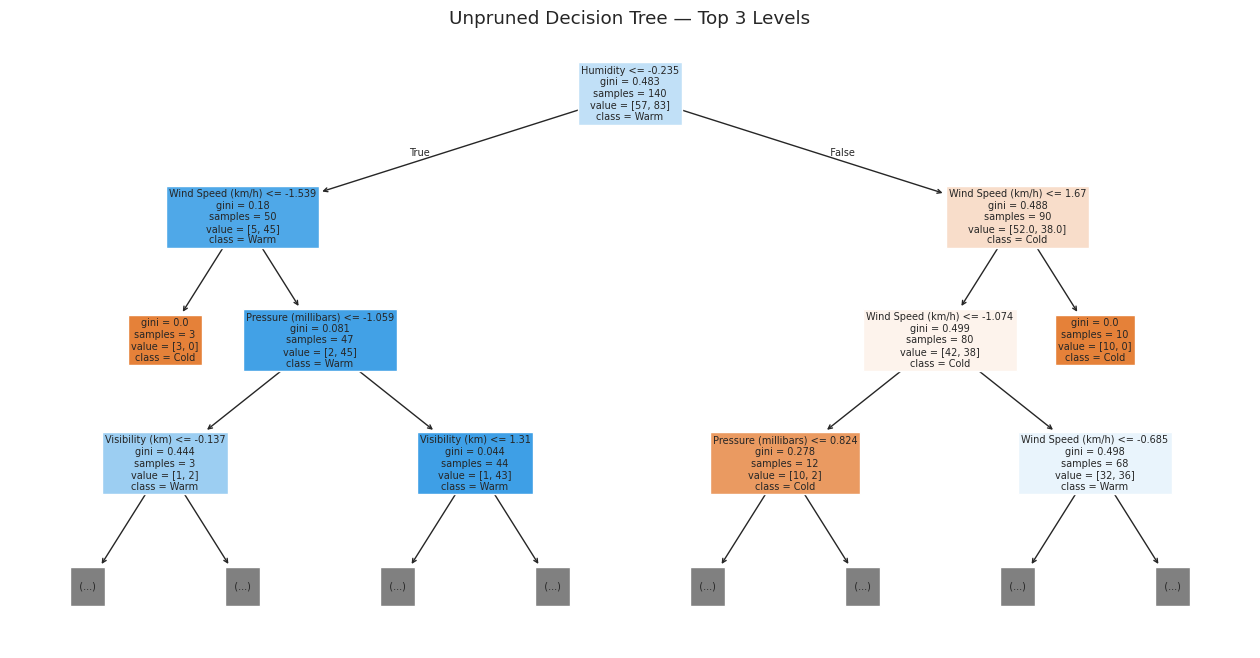

In [ ]:
# 🌳 Block 3 — Train Full Unpruned Tree
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

y_pred_full = tree_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

print(f"🌲 Unpruned Tree Accuracy: {acc_full:.4f}")
print(f"Depth: {tree_full.get_depth()} | Leaves: {tree_full.get_n_leaves()}")

# Visualize top 3 levels
plt.figure(figsize=(16,8))
plot_tree(tree_full, max_depth=3, feature_names=X.columns, class_names=['Cold','Warm'], filled=True)
plt.title("Unpruned Decision Tree — Top 3 Levels")
plt.show()


🧩 Block 4 — Pre-Pruning (max_depth, min_samples_split)

Text:
We’ll apply pre-pruning constraints and observe accuracy behavior.

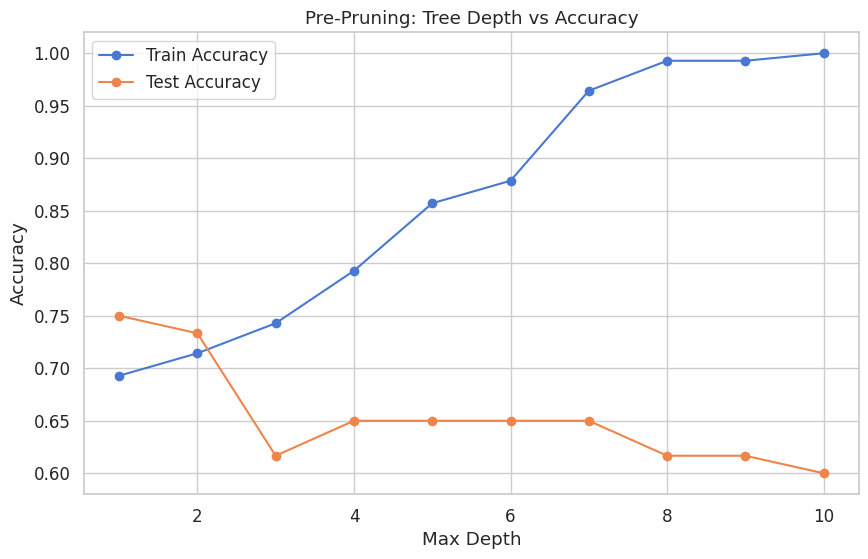

In [ ]:
# ✂️ Block 4 — Pre-Pruning using max_depth
depths = range(1, 11)
train_acc, test_acc = [], []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='o', label='Test Accuracy')
plt.title("Pre-Pruning: Tree Depth vs Accuracy")
plt.xlabel("Max Depth"); plt.ylabel("Accuracy"); plt.legend()
plt.show()


🧩 Block 5 — Train Fully Grown Tree (Baseline for Post-Pruning)

In [ ]:
# 🌲 Block 5 — Fully Grown Tree (No Restrictions)
tree_deep = DecisionTreeClassifier(random_state=42)
tree_deep.fit(X_train, y_train)
print(f"Full Tree Depth: {tree_deep.get_depth()} | Leaves: {tree_deep.get_n_leaves()}")


Full Tree Depth: 10 | Leaves: 25


🧩 Block 6 — Cost Complexity Pruning Path

Text:
We calculate α (ccp_alpha) values and corresponding impurities.

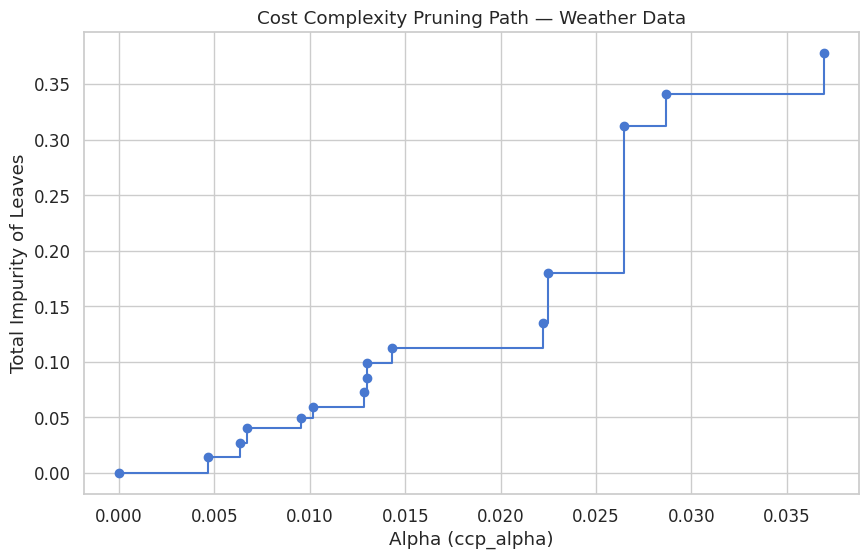

Number of candidate α values: 16


In [ ]:
# 🧮 Block 6 — Cost Complexity Pruning Path
path = tree_deep.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Total Impurity of Leaves")
plt.title("Cost Complexity Pruning Path — Weather Data")
plt.show()

print(f"Number of candidate α values: {len(ccp_alphas)}")


🧩 Block 7 — Accuracy vs Alpha

Text:
We train multiple trees for different α values and observe accuracy changes.

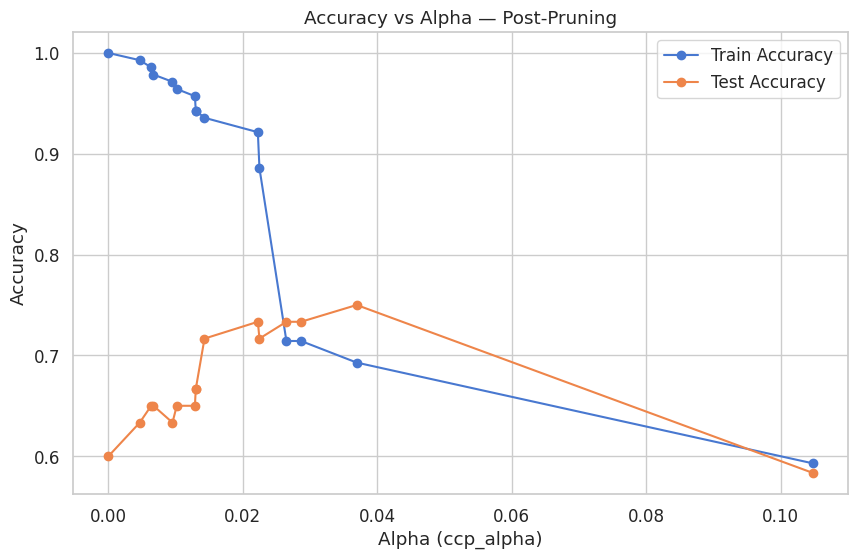

In [ ]:
# 🌿 Block 7 — Train Trees for Each α
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("Alpha (ccp_alpha)"); plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha — Post-Pruning")
plt.legend(); plt.show()


🧩 Block 8 — Select Optimal Alpha and Train Pruned Tree

In [ ]:
# ✂️ Block 8 — Optimal Alpha
optimal_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"✅ Optimal Alpha: {optimal_alpha:.5f}")

tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
tree_pruned.fit(X_train, y_train)

y_pred_pruned = tree_pruned.predict(X_test)
acc_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Pruned Tree Accuracy: {acc_pruned:.4f}")


✅ Optimal Alpha: 0.03693
Pruned Tree Accuracy: 0.7500


🧩 Block 9 — Visualize Unpruned vs Pruned Tree

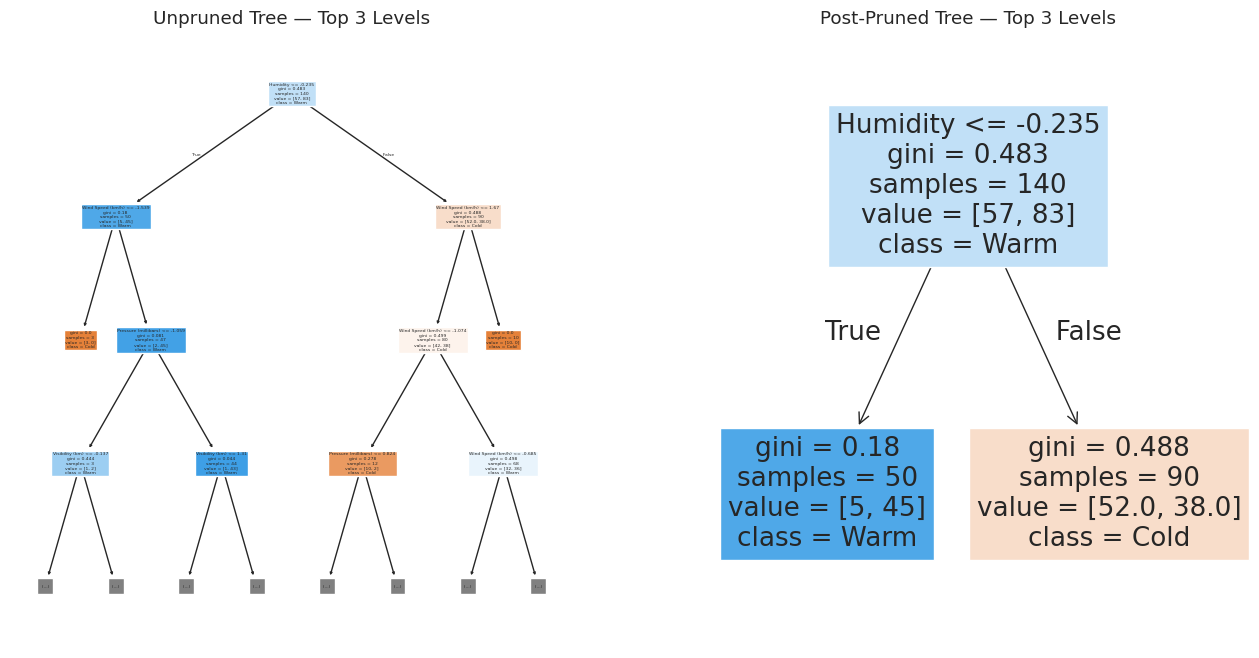

In [ ]:
# 🌳 Block 9 — Tree Comparison
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_tree(tree_full, max_depth=3, filled=True, feature_names=X.columns, class_names=['Cold','Warm'])
plt.title("Unpruned Tree — Top 3 Levels")

plt.subplot(1,2,2)
plot_tree(tree_pruned, max_depth=3, filled=True, feature_names=X.columns, class_names=['Cold','Warm'])
plt.title("Post-Pruned Tree — Top 3 Levels")
plt.show()


🧩 Block 10 — Test Different min_samples_split Values

Text:
We’ll see how varying the minimum number of samples required to split a node affects performance.

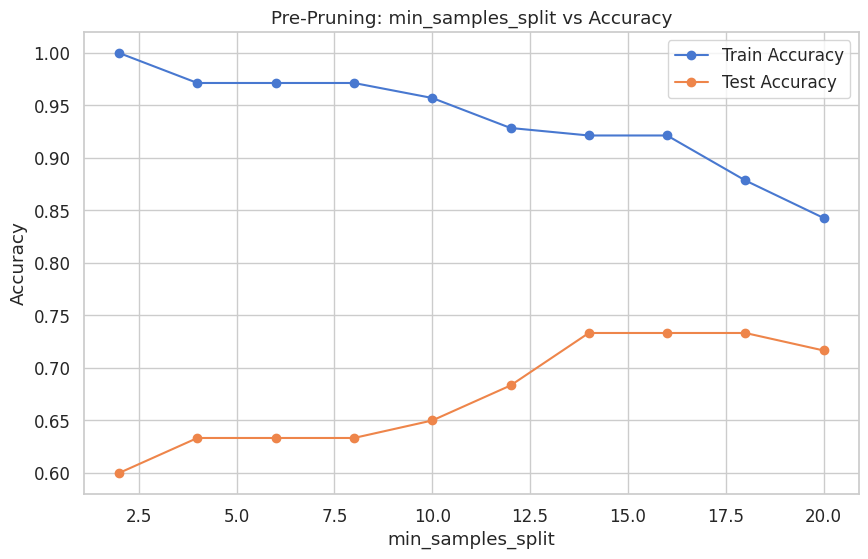

In [ ]:
# 📊 Block 10 — min_samples_split vs Accuracy
min_samples = range(2, 21, 2)
train_acc, test_acc = [], []

for m in min_samples:
    clf = DecisionTreeClassifier(min_samples_split=m, random_state=42)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(min_samples, train_acc, marker='o', label='Train Accuracy')
plt.plot(min_samples, test_acc, marker='o', label='Test Accuracy')
plt.title("Pre-Pruning: min_samples_split vs Accuracy")
plt.xlabel("min_samples_split"); plt.ylabel("Accuracy")
plt.legend(); plt.show()


🧩 Block 11 — Reports and Confusion Matrices

In [ ]:
# 📋 Block 11 — Classification Comparison
print("\nFull Tree Classification Report:")
print(classification_report(y_test, y_pred_full))

print("\nPruned Tree Classification Report:")
print(classification_report(y_test, y_pred_pruned))

cm_full = confusion_matrix(y_test, y_pred_full)
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix — Unpruned Tree")

plt.subplot(1,2,2)
sns.heatmap(cm_pruned, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Post-Pruned Tree")
plt.show()


# **🧭 Deep Analysis & Interpretation**
**🌱 Understanding Pruning**

Pre-pruning restricts growth by applying limits like max_depth or min_samples_split before the tree is fully built.

Post-pruning (cost-complexity pruning) trims branches after full growth, guided by a penalty term α.

**📉 Cost Function in Decision Trees**

Total Cost=Impurity+α×Number of Leaves

Lower α → larger, more complex tree (risk of overfitting).

Higher α → smaller, simpler tree (risk of underfitting).

**🌦️ Weather Dataset Observations**

The unpruned tree fits every training pattern — deep, complex, and prone to overfitting.

The pre-pruned models show that accuracy stabilizes beyond a certain depth (around 4–6).

The post-pruning (α tuning) curve shows an “elbow” point — a small α yields maximum test accuracy with fewer leaves.

The pruned tree retains interpretability, shorter paths, and nearly the same accuracy as the unpruned tree.

Adjusting min_samples_split also controls early branching, improving generalization.

**✅ Conclusion**

Pruning ensures that decision trees remain simple and robust:

Pre-pruning prevents overgrowth early.

Post-pruning fine-tunes complexity with α-based cost control.

On the Weather Dataset, the pruned model generalizes better and avoids overfitting noisy variations.

The optimal α offers the best bias–variance tradeoff, yielding a compact, interpretable, and accurate model.

**🌳 Unpruned = Overfitted & Deep**

**✂️ Pruned = Accurate, Interpretable & Generalized**